# Questão 3:

## Obtenção dos dados

**Primeiro, baixei o conjunto de dados de notícias disponível em:Folha UOL News Dataset:**


In [1]:
import kagglehub

path = kagglehub.dataset_download("marlesson/news-of-the-site-folhauol")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/news-of-the-site-folhauol


In [2]:
import pandas as pd
from tqdm.auto import tqdm
tqdm.pandas()


df = pd.read_csv("/kaggle/input/news-of-the-site-folhauol/articles.csv")

In [3]:
df

,title,text,date,category,subcategory,link
0,"Lula diz que está 'lascado', mas que ainda tem...",Com a possibilidade de uma condenação impedir ...,2017-09-10,poder,NaN,http://www1.folha.uol.com.br/poder/2017/10/192...
1,"'Decidi ser escrava das mulheres que sofrem', ...","Para Oumou Sangaré, cantora e ativista malines...",2017-09-10,ilustrada,NaN,http://www1.folha.uol.com.br/ilustrada/2017/10...
2,Três reportagens da Folha ganham Prêmio Petrob...,Três reportagens da Folha foram vencedoras do ...,2017-09-10,poder,NaN,http://www1.folha.uol.com.br/poder/2017/10/192...
3,Filme 'Star Wars: Os Últimos Jedi' ganha trail...,A Disney divulgou na noite desta segunda-feira...,2017-09-10,ilustrada,NaN,http://www1.folha.uol.com.br/ilustrada/2017/10...
4,CBSS inicia acordos com fintechs e quer 30% do...,"O CBSS, banco da holding Elopar dos sócios Bra...",2017-09-10,mercado,NaN,http://www1.folha.uol.com.br/mercado/2017/10/1...
...,...,...,...,...,...,...
167048,"Em cenário de crise, tucano Beto Richa assume ...",O tucano Beto Richa tinha tudo para começar se...,2015-01-01,poder,NaN,http://www1.folha.uol.com.br/poder/2015/01/156...
167049,Filho supera senador Renan Calheiros e assume ...,O economista Renan Filho (PMDB) assume nesta q...,2015-01-01,poder,NaN,http://www1.folha.uol.com.br/poder/2015/01/156...
167050,"Hoje na TV: Tottenham x Chelsea, Campeonato In...",Destaques da programação desta quinta-feira (1...,2015-01-01,esporte,NaN,http://www1.folha.uol.com.br/esporte/2015/01/1...
167051,Kim Jong-un diz estar aberto a se reunir com p...,"O líder norte-coreano, Kim Jong-un, disse nest...",2015-01-01,mundo,NaN,http://www1.folha.uol.com.br/mundo/2015/01/156...


## Obtenção do modelo e extração das entidades

**Em seguida, conforme solicitado na questão, utilizei o modelo 'monilouise/ner_pt_br' para identificar e extrair entidades mencionadas nas notícias:**

In [4]:

from transformers import AutoTokenizer, AutoModelForTokenClassification, pipeline

model_name = "monilouise/ner_pt_br"

tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForTokenClassification.from_pretrained(model_name)

ner = pipeline('ner', model=model, tokenizer=tokenizer, grouped_entities=True)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/529 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/210k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/436M [00:00<?, ?B/s]

Some weights of the model checkpoint at monilouise/ner_pt_br were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/token_classification.py:170: UserWarning: `grouped_entities` is deprecated and will be removed in version v5.0.0, defaulted to `aggregation_strategy="AggregationStrategy.SIMPLE"` instead.
  warnings.warn(


**Em seguida, filtrei os dados para a etapa seguinte, de criar um ranking das organizações que mais apareceram na seção "Mercado" no primeiro trimestre de 2015.**

Antes de criar o ranking, foi realizado o filtro dos dados para incluir apenas os dados desejados na questão.

In [5]:
# Filtrar categoria "mercado" no 1º trimestre de 2015
inicio = "2015-01-01"
fim = "2015-03-31"
df_mercado = df[
    (df['category'] == 'mercado') &
    (df['date'] >= inicio) &
    (df['date'] <= fim)
]

print(df_mercado)
df_mercado.info()

                                                    title  \
99055   Prioridade ao pós-pago reduz número de linhas ...   
99063   Dilma sanciona meta fiscal e governo liberará ...   
99064   Reportagem da Folha sobre investidor mais jove...   
99074   Impeachment pode prejudicar ajuste fiscal no B...   
99076   Petrobras anuncia 2º reajuste no preço do gás ...   
...                                                   ...   
167000  Em Miami, brasileiros gastam mais com compras ...   
167004  25% dos municípios brasileiros fecharam vagas ...   
167013  Brasileiros lideram em número de turistas que ...   
167016  Brasil só vai entrar nos eixos se fizer reform...   
167025       Turismo descobriu Miami há cerca de 100 anos   

                                                     text        date  \
99055   O mercado de telefonia celular perdeu 2,09 mil...  2015-03-12   
99063   A presidente Dilma Rousseff sancionou a altera...  2015-03-12   
99064   A reportagem da Folha "Príncipe da Bolsa

**Em seguida, foi realizada a extração das entidades apenas nos dados filtrados (categoria mercado e datados do primeiro trimestre de 2015)**:

In [6]:
def extrair_entidades(texto):
    entidades = ner(texto)
    return entidades

df_mercado['entidades'] = df_mercado['text'].progress_map(extrair_entidades)

  0%|          | 0/2111 [00:00<?, ?it/s]

<ipython-input-6-2263994973>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mercado['entidades'] = df_mercado['text'].progress_map(extrair_entidades)


**Então, foi analisado brevemente o resultado da extração das entidades, para ver se seria necessário realizar algum tratamento adicional:**

In [71]:
from pprint import pprint

pprint(df_mercado['entidades'].iloc[0], width=100)

[{'end': 157, 'entity_group': 'PUB', 'score': np.float32(0.97653186), 'start': 154, 'word': 'Ana'},
 {'end': 160,
  'entity_group': 'PUB',
  'score': np.float32(0.94728583),
  'start': 157,
  'word': '##tel'},
 {'end': 181,
  'entity_group': 'PUB',
  'score': np.float32(0.98799914),
  'start': 162,
  'word': 'Agência Nacional de'},
 {'end': 198,
  'entity_group': 'PUB',
  'score': np.float32(0.9836569),
  'start': 182,
  'word': 'Telecomunicações'},
 {'end': 397,
  'entity_group': 'LOC',
  'score': np.float32(0.9301639),
  'start': 391,
  'word': 'Brasil'},
 {'end': 829, 'entity_group': 'ORG', 'score': np.float32(0.9620528), 'start': 824, 'word': 'Claro'},
 {'end': 839, 'entity_group': 'ORG', 'score': np.float32(0.6072507), 'start': 834, 'word': 'grupo'},
 {'end': 847,
  'entity_group': 'ORG',
  'score': np.float32(0.7203863),
  'start': 840,
  'word': 'América'},
 {'end': 853,
  'entity_group': 'ORG',
  'score': np.float32(0.97052306),
  'start': 848,
  'word': 'Móvil'},
 {'end': 924,

In [73]:
pprint(df_mercado['text'].iloc[0])

('O mercado de telefonia celular perdeu 2,09 milhões de linhas em outubro, '
 'diante de nova diminuição no número de acessos pré-pagos, de acordo com '
 'dados da Anatel (Agência Nacional de Telecomunicações).  A base de telefonia '
 'móvel do país no fim de outubro era de 273,8 milhões de acessos, dos quais '
 '201,3 milhões correspondiam a linhas pré-pagas, e 72,5 milhões, a '
 'pós-pagas.  Um ano antes, o Brasil tinha pouco mais de 279 milhões de '
 'acessos celulares, dos quais 213 milhões eram conexões pré-pagas, e 66 '
 'milhões, pós.  O desempenho de outubro marcou o quinto mês seguido de queda '
 'na base da telefonia móvel, diante de estratégia das operadoras de priorizar '
 'segmento mais rentável de pós-pagos e com tendência dos usuários de reduzir '
 'o número de chips em uso.    A operadora que viu a maior redução da base em '
 'setembro foi a Claro, do grupo América Móvil, com queda de 1,3 milhão de '
 'acessos, para 69 milhões.  Em seguida, a TIM teve recuo de mais de 6

## Tratamento dos dados das entidades

**Ao comparar as entidades extraídas com o texto acima, é possível perceber que será necessário realizar um tratamento.**

O tokenizador utilizado no modelo gera ## em algumas palavras e quebra entidades porque ele é baseado em WordPiece, um método comum em modelos como BERT.

Esse método usa tokenização subword, ou seja, quebra palavras desconhecidas ou complexas em pedaços menores chamados de subwords
(referência: https://huggingface.co/learn/llm-course/chapter6/6)

Para tratar isso, vou utilizar o método reconstruir_entidades abaixo:


In [9]:

def reconstruir_entidades(entidades):
    resultado = []
    if not entidades:
        return resultado

    atual = entidades[0]
    entidade_atual = atual['word'].replace("##", "")
    tipo_atual = atual['entity_group']
    score_atual = [atual['score']]
    end_atual = atual['end']

    for prox in entidades[1:]:
        tipo_prox = prox['entity_group']
        word_prox = prox['word'].replace("##", "")
        start_prox = prox['start']
        is_subword = prox['word'].startswith("##")

        if tipo_prox == tipo_atual and (start_prox == end_atual or is_subword):
            entidade_atual += word_prox
            score_atual.append(prox['score'])
            end_atual = prox['end']
        else:
            # Finaliza entidade anterior
            resultado.append({
                'entidade': entidade_atual.strip(),
                'tipo': tipo_atual,
                'score': sum(score_atual) / len(score_atual)
            })
            # Inicia nova
            entidade_atual = word_prox
            tipo_atual = tipo_prox
            score_atual = [prox['score']]
            end_atual = prox['end']

    # Adiciona a última
    resultado.append({
        'entidade': entidade_atual.strip(),
        'tipo': tipo_atual,
        'score': sum(score_atual) / len(score_atual)
    })

    return resultado

# Executando o método e armazenando na coluna nova 'entidades_reconstruidas':

df_mercado['entidades_reconstruidas'] = df_mercado['entidades'].progress_map(reconstruir_entidades)

  0%|          | 0/2111 [00:00<?, ?it/s]

<ipython-input-9-1819882574>:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mercado['entidades_reconstruidas'] = df_mercado['entidades'].progress_map(reconstruir_entidades)


Agora as entidades estão tratadas. Mas ainda é possível fazer um tratamento adicional: remover entidades que, isoladamente, forem apenas artigos ou caracteres isolados, o que não agregaria valor para a análise, e provavelmente representariam erros na tokenização.

Além disso, é necessário juntar todas as entidades em uma única lista.

Por fim, como a questão pede apenas entidades do tipo ORGANIZAÇÃO, esse filtro também é feito:

In [10]:

# Juntando todas as entidades em uma única lista:
todas_entidades_mercado = df_mercado['entidades_reconstruidas'].explode().dropna().tolist()


# Filtrando entidades válidas (com tamanho mínimo ou não sendo apenas artigo)
artigos_descartar = {"o", "a", "os", "as", "de", "do", "da", "dos", "das"}
entidades_filtradas_mercado = [
    ent for ent in todas_entidades_mercado
    if ent['entidade'].lower() not in artigos_descartar and len(ent['entidade']) > 1
]

# Pegando apenas entidades do tipo ORGANIZAÇÃO
entidades_organizacao_mercado = [ent for ent in entidades_filtradas_mercado if ent['tipo'] == 'ORG']

In [11]:

# se quisermos o mesmo dado mas como um dataframe:

df_entidades_organizacao_mercado = pd.DataFrame(entidades_organizacao_mercado)

print(df_entidades_organizacao_mercado)


         entidade tipo     score
0           Claro  ORG  0.962053
1           grupo  ORG  0.607251
2         América  ORG  0.720386
3           Móvil  ORG  0.970523
4             TIM  ORG  0.862184
...           ...  ...       ...
9039  Hypermarcas  ORG  0.956948
9040  Hypermarcas  ORG  0.955067
9041     Standart  ORG  0.929417
9042          Oil  ORG  0.951169
9043         Esso  ORG  0.842019

[9044 rows x 3 columns]


# Criação do Ranking

A próxima etapa é a criação do ranking com os dados das organizações:

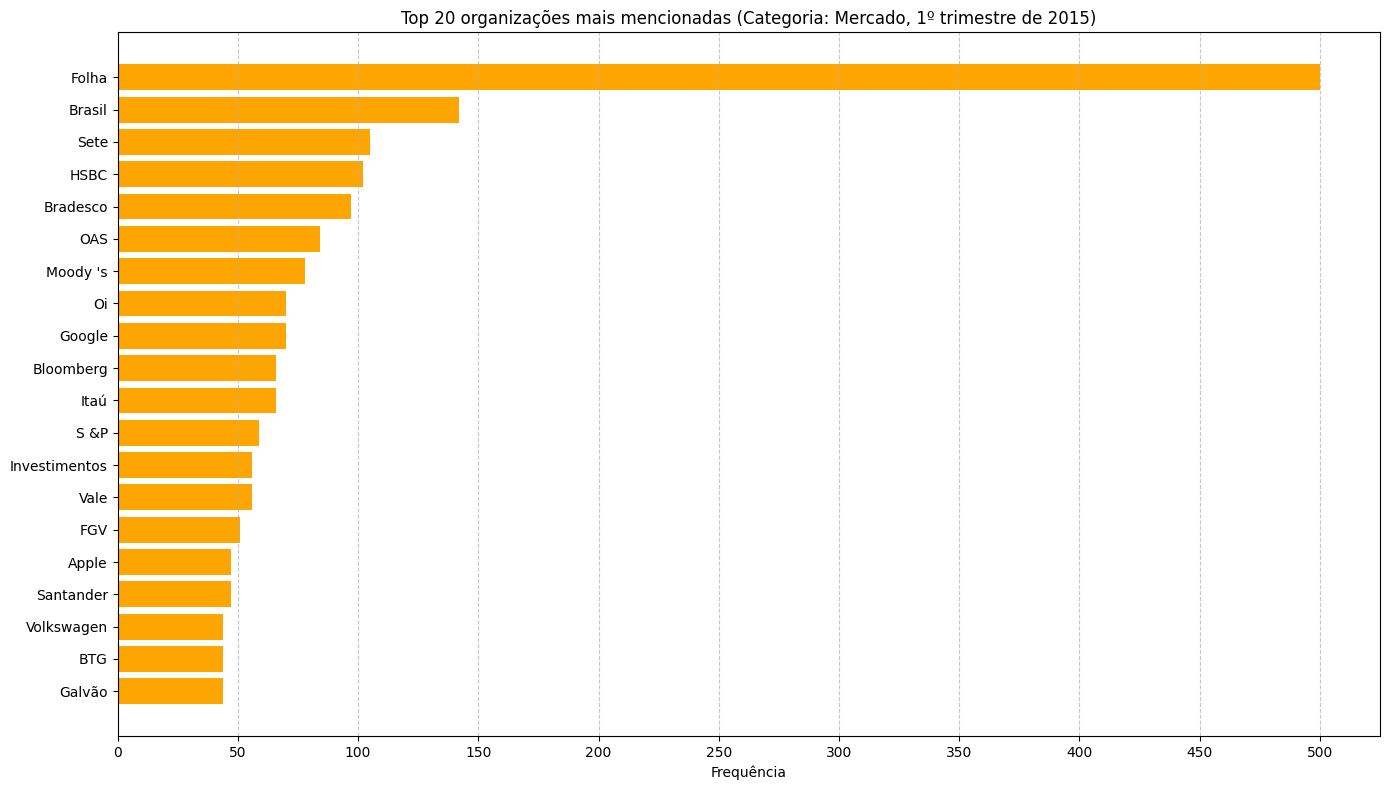

In [12]:
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

nomes_entidades = [ent['entidade'] for ent in entidades_organizacao_mercado]
contagem_organizacao_mercado = Counter(nomes_entidades)

# Transformar em DataFrame para visualização
df_ranking_organizacao_mercado = pd.DataFrame(contagem_organizacao_mercado.items(), columns=['Entidade', 'Frequência'])
df_ranking_organizacao_mercado = df_ranking_organizacao_mercado.sort_values(by='Frequência', ascending=False).reset_index(drop=True)

# Plotar gráfico de barras com as 20 entidades mais frequentes
top_n = 20
plt.figure(figsize=(14, 8))
plt.barh(df_ranking_organizacao_mercado['Entidade'][:top_n][::-1], df_ranking_organizacao_mercado['Frequência'][:top_n][::-1], color='orange')
plt.xlabel('Frequência')
plt.title(f'Top {top_n} organizações mais mencionadas (Categoria: Mercado, 1º trimestre de 2015)')

max_freq = df_ranking_organizacao_mercado['Frequência'].max()
xticks = np.arange(0, max_freq + 50, 50)
plt.xticks(xticks)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Criação do WordCloud

Após a criação do ranking, foram utilizados os mesmos dados tratados para criação do WordCloud:

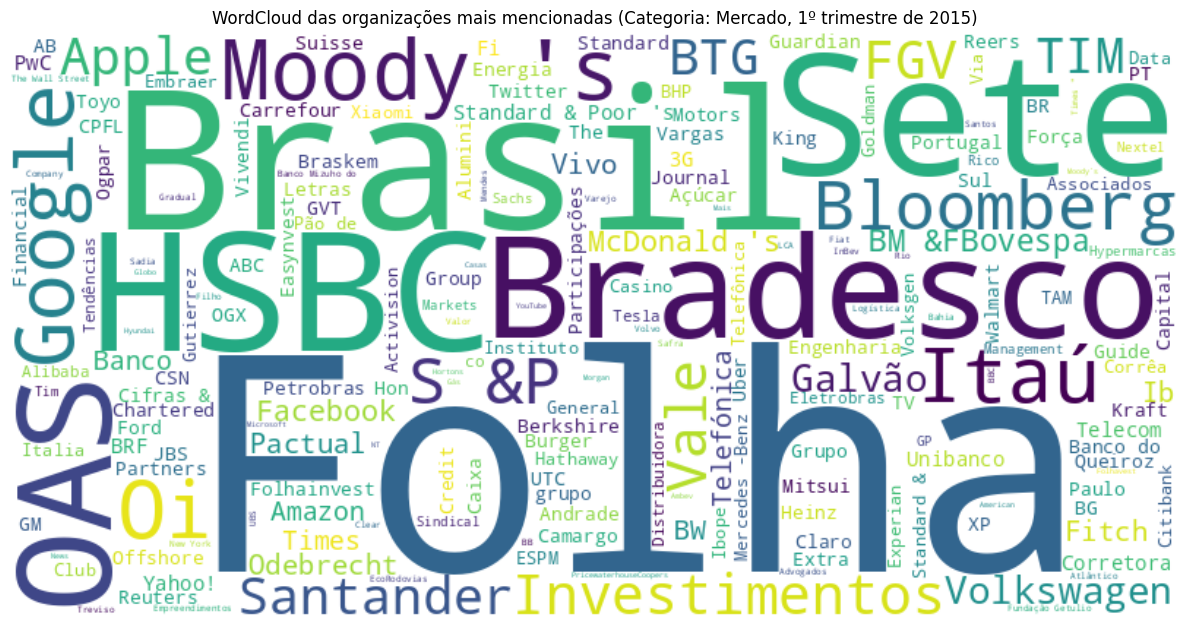

In [85]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Gera um dicionário com as frequências das entidades
frequencias_dict_organizacao_mercado = dict(contagem_organizacao_mercado)

# Criar o objeto WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate_from_frequencies(frequencias_dict_organizacao_mercado)

# Exibir a WordCloud
plt.figure(figsize=(12, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud das organizações mais mencionadas (Categoria: Mercado, 1º trimestre de 2015)')
plt.tight_layout()
plt.show()

## Análise e filtragem final dos dados

Dos dados observados no ranking acima, é possível perceber que algumas organizações, pelo menos a princípio, carecem de um significado maior, e para isso analisaremos como elas aparecem nos textos originais.

Inicialmente analisaremos as organizações "Brasil", "Folha" e "Investimentos"

"Brasil" como organização pode ser apenas o complemento do nome de outras organizações; o mesmo pode acontecer com "Investimentos". Já com relação a "Folha", trata-se do nome da empresa que é a fonte original dos dados, então além de ser um dado enviesado, não agrega muito significado para nossa análise.

Vamos então analisar os textos em que essas palavras aparecem como entidades do tipo ORGANIZAÇÃO.

In [75]:
# fazendo a análise de alguns dados:
# Brasil, Folha e Investimentos - quando essas entidades aparecem como organizações, qual o contexto dessas palavras?


df_brasil_org = df_mercado[
    df_mercado['entidades_reconstruidas'].apply(
        lambda lista: any(
            ent.get('entidade') == 'Brasil' and ent.get('tipo') == 'ORG'
            for ent in lista if isinstance(ent, dict)
        )
    )
]
df_folha_org = df_mercado[
    df_mercado['entidades_reconstruidas'].apply(
        lambda lista: any(ent['entidade'] == 'Folha' and ent.get('tipo') == 'ORG'
                          for ent in lista if isinstance(ent, dict))
    )
]

df_investimentos_org = df_mercado[
    df_mercado['entidades_reconstruidas'].apply(
        lambda lista: any(ent['entidade'] == 'Investimentos' and ent.get('tipo') == 'ORG'
                          for ent in lista if isinstance(ent, dict))
    )
]

import textwrap

In [33]:
df_brasil_org

,title,text,date,category,subcategory,link,entidades,entidades_reconstruidas
99089,"Com cenário político, Bolsa tem maior alta em ...",O mercado financeiro reagiu nesta quinta-feira...,2015-03-12,mercado,NaN,http://www1.folha.uol.com.br/mercado/2015/12/1...,"[{'entity_group': 'PUB', 'score': 0.9398403, '...","[{'entidade': 'Câmara dos', 'tipo': 'PUB', 'sc..."
99100,Liminar determina que Petrobras suspenda venda...,"O juiz Manoel Ricardo Calheiros D'avila, da 5ª...",2015-03-12,mercado,NaN,http://www1.folha.uol.com.br/mercado/2015/12/1...,"[{'entity_group': 'PESSOA', 'score': 0.911794,...",[{'entidade': 'Manoel Ricardo Calheiros D' avi...
99162,Bolsa dispara após Cunha acatar pedido de impe...,O mercado financeiro reagia nesta quinta-feira...,2015-03-12,mercado,NaN,http://www1.folha.uol.com.br/mercado/2015/12/1...,"[{'entity_group': 'PUB', 'score': 0.9324151, '...","[{'entidade': 'Câmara dos', 'tipo': 'PUB', 'sc..."
99215,Agência S&P retira selo de bom pagador de 53 e...,Como sintoma da deterioração da economia globa...,2015-03-12,mercado,NaN,http://www1.folha.uol.com.br/mercado/2015/12/1...,"[{'entity_group': 'LOC', 'score': 0.9351325, '...","[{'entidade': 'Brasil', 'tipo': 'LOC', 'score'..."
99394,Shell mantém investimentos no Brasil mesmo com...,"O presidente da Shell Brasil, André Araújo, di...",2015-02-12,mercado,NaN,http://www1.folha.uol.com.br/mercado/2015/12/1...,"[{'entity_group': 'ORG', 'score': 0.92711914, ...","[{'entidade': 'Shell', 'tipo': 'ORG', 'score':..."
...,...,...,...,...,...,...,...,...
163614,Socorro a parceira da Petrobras no pré-sal dev...,Depois da reunião da presidente Dilma com banc...,2015-01-17,mercado,NaN,http://www1.folha.uol.com.br/mercado/2015/01/1...,"[{'entity_group': 'PESSOA', 'score': 0.9632773...","[{'entidade': 'Dilma', 'tipo': 'PESSOA', 'scor..."
163768,Volkswagen readmite 800 funcionários e greve d...,Trabalhadores da fábrica da Volkswagen em São ...,2015-01-16,mercado,NaN,http://www1.folha.uol.com.br/mercado/2015/01/1...,"[{'entity_group': 'ORG', 'score': 0.90740323, ...","[{'entidade': 'Volkswagen', 'tipo': 'ORG', 'sc..."
163856,Dilma quer socorro à maior fornecedora de sond...,Preocupada com as dificuldades financeiras da ...,2015-01-16,mercado,NaN,http://www1.folha.uol.com.br/mercado/2015/01/1...,"[{'entity_group': 'ORG', 'score': 0.9830172, '...","[{'entidade': 'Sete', 'tipo': 'ORG', 'score': ..."
163923,Petrobras sobe mais de 6% e ajuda Bolsa a romp...,O principal índice da Bolsa brasileira fechou ...,2015-01-15,mercado,NaN,http://www1.folha.uol.com.br/mercado/2015/01/1...,"[{'entity_group': 'PUB', 'score': 0.5417997, '...","[{'entidade': 'Petrobras', 'tipo': 'PUB', 'sco..."


**Abaixo, analisaremos alguns textos em que aparece a palavra "Brasil", e é possível ver então que, conforme a hipótese inicial, essa entidade na verdade é um complemento do nome de outras organizações, como "Banco do Brasil", "Sete Brasil" e "Santander Brasil".**

In [76]:
texto = df_brasil_org.loc[163614, 'text']
print('\n'.join(textwrap.wrap(texto, width=100)))

Depois da reunião da presidente Dilma com bancos públicos para destravar financiamentos para a Sete
Brasil, a assinatura do contrato de empréstimo do BNDES, no valor total de US$ 3,5 bilhões (R$ 9,2
bilhões), com a empresa deve ocorrer na próxima semana.  Segundo assessores presidenciais, restam
algumas últimas "pendências" a serem superadas, mas cuja solução já está encaminhada, para a
formalização da contratação do empréstimo, aprovado desde o início do ano passado pelo banco.  Na
última quarta-feira (14), Dilma se reuniu com os presidentes do BNDES, Luciano Coutinho, e do Banco
do Brasil, Aldemir Bendine, para buscar liberar recursos destinados à Sete Brasil, maior fornecedora
de sondas para Petrobras no pré-sal.  Dilma está preocupada com as dificuldades financeiras da
empresa, que podem afetar outras companhias da indústria naval, gerando mais demissões no setor.  A
demora na liberação de recursos por parte dos bancos, inicialmente provocada por atrasos de
pagamentos, piorou com o

In [77]:
texto = df_brasil_org.loc[164414, 'text']
print('\n'.join(textwrap.wrap(texto, width=100)))

O Santander Brasil anunciou nesta terça-feira (13) a compra de 50% da Super, plataforma digital que
oferece conta de pagamento eletrônica, cartão pré-pago e acesso a serviços financeiros
simplificados.  O banco já havia confirmado em outubro que estava negociando a operação, conforme
informou o "Valor". O banco não divulgou o valor da operação.  "O modelo de negócios da Super é
estratégico, pois proporciona a uma parcela importante da população o primeiro contato com serviços
financeiros", afirmou em nota Conrado Engel, vice-presidente executivo sênior de varejo do
Santander.  A Super emite os cartões e também oferece uma conta de pagamento, uma espécie de conta
corrente simplificada e regulamentada pelo Banco Central (BC) em 2013.  O cliente da Super não só
pode ter um cartão pré-pago para usar no comércio, como usar a conta para fazer apostas na loteria,
fazer transferências ou comprar crédito para celular. A gestão dessas ferramentas é feita pela
internet.  A Super tem cerca de 180 

In [79]:
texto = df_brasil_org.loc[163768, 'text']
print('\n'.join(textwrap.wrap(texto, width=100)))

Trabalhadores da fábrica da Volkswagen em São Bernardo do Campo, na região metropolitana de São
Paulo, aprovaram nesta sexta-feira (16) o fim de uma greve que já durava dez dias depois que a
montadora aceitou readmitir 800 funcionários demitidos no início do ano.  Com isso, a produção na
fábrica será retomada a partir da próxima segunda-feira (19), informou o Sindicato dos Metalúrgicos
do ABC.  Após dias de negociação, a entidade e a montadora chegaram a uma nova proposta, que foi
aprovada pelos funcionários na manhã desta sexta.  A proposta é semelhante à rejeitada pelos
trabalhadores em 2 de dezembro. A principal diferença é que a primeira incluía o pagamento de um
abono salarial em troca do congelamento dos salários em 2015 e 2016, enquanto a segunda admite o
abono em 2015, mas volta com reajuste salarial no ano seguinte.  Em nota, a montadora disse que o
resultado das negociações é "balanceado" e abrange a continuidade dos "mecanismos de adequação de
efetivo por meio de Programas V

**Abaixo, a mesma análise é feita, mas agora em alguns textos em que aparece a palavra "Investimentos", e é possível ver então que, conforme a hipótese inicial, essa entidade na verdade é um complemento do nome de outras organizações, como "XP Investimentos" e "Banco Rural de Investimentos".**

In [38]:
df_investimentos_org

,title,text,date,category,subcategory,link,entidades,entidades_reconstruidas
99089,"Com cenário político, Bolsa tem maior alta em ...",O mercado financeiro reagiu nesta quinta-feira...,2015-03-12,mercado,NaN,http://www1.folha.uol.com.br/mercado/2015/12/1...,"[{'entity_group': 'PUB', 'score': 0.9398403, '...","[{'entidade': 'Câmara dos', 'tipo': 'PUB', 'sc..."
99118,São Paulo fica em primeiro no ranking de cidad...,A cidade de São Paulo alcançou a primeira colo...,2015-03-12,mercado,NaN,http://www1.folha.uol.com.br/mercado/2015/12/1...,"[{'entity_group': 'LOC', 'score': 0.9847666, '...","[{'entidade': 'São', 'tipo': 'LOC', 'score': 0..."
99505,Saques de fundos do BTG Pactual somam ao menos...,Depois das retiradas expressivas logo após a p...,2015-02-12,mercado,NaN,http://www1.folha.uol.com.br/mercado/2015/12/1...,"[{'entity_group': 'PESSOA', 'score': 0.9929832...","[{'entidade': 'André', 'tipo': 'PESSOA', 'scor..."
105159,Bolsa tem maior alta em quase um ano e dólar a...,Os mercados acionário e cambial tiveram uma se...,2015-03-11,mercado,NaN,http://www1.folha.uol.com.br/mercado/2015/11/1...,"[{'entity_group': 'PUB', 'score': 0.9586507, '...","[{'entidade': 'Banco', 'tipo': 'PUB', 'score':..."
111290,"Com incertezas políticas, dólar fecha em alta ...",O cenário político voltou a empurrar o dólar p...,2015-01-10,mercado,NaN,http://www1.folha.uol.com.br/mercado/2015/10/1...,"[{'entity_group': 'PUB', 'score': 0.85845387, ...","[{'entidade': 'Congresso', 'tipo': 'PUB', 'sco..."
116622,Dólar comercial fecha estável após reunião de ...,Dúvidas em torno da permanência do ministro Jo...,2015-03-09,mercado,NaN,http://www1.folha.uol.com.br/mercado/2015/09/1...,"[{'entity_group': 'PESSOA', 'score': 0.9908977...","[{'entidade': 'Joaquim', 'tipo': 'PESSOA', 'sc..."
117051,"Dólar bate R$ 3,70 pela 1ª vez desde 2002 com ...",A deterioração do cenário fiscal brasileiro e ...,2015-01-09,mercado,NaN,http://www1.folha.uol.com.br/mercado/2015/09/1...,"[{'entity_group': 'PUB', 'score': 0.6375134, '...","[{'entidade': 'Congresso', 'tipo': 'PUB', 'sco..."
122812,Corretores projetam que dólar deve chegar a R$...,Corretores e especialistas em câmbio acreditam...,2015-03-08,mercado,NaN,http://www1.folha.uol.com.br/mercado/2015/08/1...,"[{'entity_group': 'ORG', 'score': 0.9519494, '...","[{'entidade': 'Folha', 'tipo': 'ORG', 'score':..."
128806,Cade investiga bancos por suposta manipulação ...,O Cade (Conselho Administrativo de Defesa Econ...,2015-02-07,mercado,NaN,http://www1.folha.uol.com.br/mercado/2015/07/1...,"[{'entity_group': 'PUB', 'score': 0.9243474, '...","[{'entidade': 'Cade', 'tipo': 'PUB', 'score': ..."
134400,"Mercado projeta alta de 0,50 ponto do juro bás...","O dado mais recente sobre a inflação oficial, ...",2015-03-06,mercado,NaN,http://www1.folha.uol.com.br/mercado/2015/06/1...,"[{'entity_group': 'PUB', 'score': 0.6299876, '...","[{'entidade': 'Copom', 'tipo': 'PUB', 'score':..."


In [80]:
texto = df_investimentos_org.loc[111290, 'text']
print('\n'.join(textwrap.wrap(texto, width=100)))

O cenário político voltou a empurrar o dólar para cima nesta quinta-feira (1º), depois do alívio na
sessão anterior. O adiamento da avaliação dos vetos à chamada pauta-bomba pelo Congresso, a
expectativa sobre a reforma ministerial e o avanço das investigações de políticos envolvidos na Lava
Jato ampliaram o ceticismo sobre a aprovação de medidas fiscais e provocaram alta nos juros futuros.
Após ter começado o dia em queda, o dólar à vista, referência no mercado financeiro, inverteu a
tendência ainda pela manhã e fechou o dia com valorização de 1,24% sobre o real, para R$ 4,006 na
venda. Já o dólar comercial, utilizado no comércio exterior, avançou 1%, a R$ 4,004.  "A reforma
ministerial e as notícias em relação à investigação de Eduardo Cunha [presidente da Câmara dos
Deputados] na Suíça deixaram o mercado em alerta, em compasso de espera. Ele é um dos principais
críticos ao governo", disse Reginaldo Galhardo, gerente de câmbio da Treviso Corretora.  A avaliação
de analistas ouvidos p

In [81]:
texto = df_investimentos_org.loc[159645, 'text']
print('\n'.join(textwrap.wrap(texto, width=100)))

A Justiça de Minas Gerais negou o pedido de autofalência do Banco Rural, que ficou conhecido pelo
escândalo do mensalão. A instituição teve sua liquidação extrajudicial decretada pelo Banco Central
em agosto de 2013.  Com a falência negada, o banco continuará em regime especial de liquidação, em
que os bens e os demais ativos são gerenciados pelo liquidante Osmar Brasil de Almeida, nomeado pelo
Banco Central. O banco não funcionava desde a liquidação.  A decisão foi do juiz Ronaldo Claret, da
1ª Vara Empresarial de Belo Horizonte, que considerou extinto o pedido de autofalência por ter sido
feito pelo liquidante nomeado pelo BC sem a realização de uma assembleia de acionistas, como pede a
Lei das Sociedades Anônimas.  O juiz afirmou ainda que não via motivo para a autofalência das demais
empresas do grupo –Banco Rural de Investimentos, Banco Mais e Banco Simples – porque tinham ativos
suficientes para cobrir suas dívidas.  A Procuradoria-Geral do Banco Central informou que vai
recorrer

**Abaixo, a mesma análise é feita, mas agora em alguns textos em que aparece a palavra "Folha".**

In [42]:
df_folha_org

,title,text,date,category,subcategory,link,entidades,entidades_reconstruidas
99064,Reportagem da Folha sobre investidor mais jove...,"A reportagem da Folha ""Príncipe da Bolsa"", de ...",2015-03-12,mercado,NaN,http://www1.folha.uol.com.br/mercado/2015/12/1...,"[{'entity_group': 'ORG', 'score': 0.64951515, ...","[{'entidade': 'Folha', 'tipo': 'ORG', 'score':..."
99074,Impeachment pode prejudicar ajuste fiscal no B...,A abertura do processo de impeachment da presi...,2015-03-12,mercado,NaN,http://www1.folha.uol.com.br/mercado/2015/12/1...,"[{'entity_group': 'PESSOA', 'score': 0.9834018...","[{'entidade': 'Dilma', 'tipo': 'PESSOA', 'scor..."
99126,"Turistas estrangeiros consideram Brasil caro, ...",Apesar do grande interesse em conhecer o Brasi...,2015-03-12,mercado,NaN,http://www1.folha.uol.com.br/mercado/2015/12/1...,"[{'entity_group': 'LOC', 'score': 0.9339297, '...","[{'entidade': 'Brasil', 'tipo': 'LOC', 'score'..."
99127,Petroleiras esperam novos leilões do pré-sal n...,O Instituto Brasileiro de Petróleo (IBP) esper...,2015-03-12,mercado,NaN,http://www1.folha.uol.com.br/mercado/2015/12/1...,"[{'entity_group': 'ORG', 'score': 0.6681684, '...","[{'entidade': 'Instituto Brasileiro', 'tipo': ..."
99162,Bolsa dispara após Cunha acatar pedido de impe...,O mercado financeiro reagia nesta quinta-feira...,2015-03-12,mercado,NaN,http://www1.folha.uol.com.br/mercado/2015/12/1...,"[{'entity_group': 'PUB', 'score': 0.9324151, '...","[{'entidade': 'Câmara dos', 'tipo': 'PUB', 'sc..."
...,...,...,...,...,...,...,...,...
166642,"Venda de carros cai 7,4% em 2014 e tem pior de...",O mês de dezembro foi o terceiro melhor da his...,2015-03-01,mercado,NaN,http://www1.folha.uol.com.br/mercado/2015/01/1...,"[{'entity_group': 'LOC', 'score': 0.9310022, '...","[{'entidade': 'Brasil', 'tipo': 'LOC', 'score'..."
166668,"Líder por 27 anos, Gol perde posto para Palio ...","Após 27 anos seguidos de hegemonia, o Volkswag...",2015-03-01,mercado,NaN,http://www1.folha.uol.com.br/mercado/2015/01/1...,"[{'entity_group': 'ORG', 'score': 0.39603943, ...","[{'entidade': 'Volks', 'tipo': 'ORG', 'score':..."
166832,Vídeo: Conheça mais sobre o investimento CRA,"Em vídeo para o ""Folhainvest"", o professor da ...",2015-02-01,mercado,NaN,http://www1.folha.uol.com.br/mercado/2015/01/1...,"[{'entity_group': 'ORG', 'score': 0.6327103, '...","[{'entidade': 'Folhavest', 'tipo': 'ORG', 'sco..."
166853,"Economia está dando dois passinhos para trás, ...","Nos últimos anos, o grupo O Boticário criou tr...",2015-02-01,mercado,NaN,http://www1.folha.uol.com.br/mercado/2015/01/1...,"[{'entity_group': 'ORG', 'score': 0.78393024, ...","[{'entidade': 'O', 'tipo': 'ORG', 'score': 0.7..."


In [45]:
import textwrap

texto = df_folha_org.loc[99064, 'text']
print('\n'.join(textwrap.wrap(texto, width=100)))

A reportagem da Folha "Príncipe da Bolsa", de autoria de Danielle Brant e Anderson Figo, publicada
em setembro, foi a vencedora da 27ª edição do Prêmio de Jornalismo BM&FBovespa, na categoria Jornal
- São Paulo e Rio de Janeiro.  O texto traça o perfil de Luis Felipe Mattiuzzo, 10, o mais jovem
investidor da Bolsa brasileira. Uma vez por mês o menino recebe R$ 1.000 do pai exclusivamente para
comprar ações.  Criada em 1988, a premiação busca reconhecer a contribuição do trabalho da imprensa
para o desenvolvimento do mercado de capitais no país. Concorreram na categoria Jornal - São Paulo e
Rio de Janeiro 29 reportagens de 25 jornalistas.  A reportagem "Investidores buscam mercados
internacionais", de Rafael Vigna, do "Jornal do Comércio" (RS), ganhou o prêmio na categoria Jornal
- Demais Capitais e Interior.  Em Mídia On-line, a vencedora foi Fernanda Guimarães, da Agência
Estado, com a reportagem "Estatais deverão provar governança antes de abertura de capital da Caixa".
Marianna Arag

**Por fim, foi feita também uma breve análise em relação à entidade "Galvão", e verificou-se que ela efetivamente se refere a uma organização:**

In [55]:
df_galvao_org = df_mercado[
    df_mercado['entidades_reconstruidas'].apply(
        lambda lista: any(ent['entidade'] == 'Galvão' and ent.get('tipo') == 'ORG'
                          for ent in lista if isinstance(ent, dict))
    )
]

df_galvao_org

,title,text,date,category,subcategory,link,entidades,entidades_reconstruidas
134470,Investigadas na Lava Jato estudam participação...,"Os grupos Odebrecht, Andrade Gutierrez e Camar...",2015-03-06,mercado,NaN,http://www1.folha.uol.com.br/mercado/2015/06/1...,"[{'entity_group': 'ORG', 'score': 0.7795532, '...","[{'entidade': 'Odebrecht', 'tipo': 'ORG', 'sco..."
140525,Sócios podem pôr R$ 100 milhões no Estaleiro A...,Símbolo do projeto do governo Lula de reconstr...,2015-02-05,mercado,NaN,http://www1.folha.uol.com.br/mercado/2015/05/1...,"[{'entity_group': 'PESSOA', 'score': 0.6413199...","[{'entidade': 'Lula', 'tipo': 'PESSOA', 'score..."
146033,"Demissão de operários é ""farsa"" da Queiroz Gal...","O prefeito do Rio, Eduardo Paes, classificou a...",2015-02-04,mercado,NaN,http://www1.folha.uol.com.br/mercado/2015/04/1...,"[{'entity_group': 'PESSOA', 'score': 0.9919905...","[{'entidade': 'Eduardo', 'tipo': 'PESSOA', 'sc..."
146040,Demitidos pela Queiroz Galvão podem ser recont...,"Demitidos pela construtora Queiroz Galvão, ope...",2015-02-04,mercado,NaN,http://www1.folha.uol.com.br/mercado/2015/04/1...,"[{'entity_group': 'ORG', 'score': 0.9808637, '...","[{'entidade': 'Queiroz', 'tipo': 'ORG', 'score..."
146190,Queiroz Galvão demite 70 funcionários e coloca...,A construtora Queiroz Galvão ameaça paralisar ...,2015-01-04,mercado,NaN,http://www1.folha.uol.com.br/mercado/2015/04/1...,"[{'entity_group': 'ORG', 'score': 0.98105466, ...","[{'entidade': 'Queiroz', 'tipo': 'ORG', 'score..."
146956,Crise aumenta recuperações judiciais e aliment...,"Economia parada, crédito escasso, empresas à b...",2015-03-29,mercado,NaN,http://www1.folha.uol.com.br/mercado/2015/03/1...,"[{'entity_group': 'PESSOA', 'score': 0.7238693...","[{'entidade': 'Lior', 'tipo': 'PESSOA', 'score..."
147402,OAS livrará só 3 empresas de pedido de recuper...,Só três companhias da OAS de um total de nove ...,2015-03-27,mercado,NaN,http://www1.folha.uol.com.br/mercado/2015/03/1...,"[{'entity_group': 'ORG', 'score': 0.96708953, ...","[{'entidade': 'OAS', 'tipo': 'ORG', 'score': 0..."
147662,"Envolvida na Lava Jato, Galvão Engenharia pede...","Investigada na Operação Lava Jato, a Galvão En...",2015-03-25,mercado,NaN,http://www1.folha.uol.com.br/mercado/2015/03/1...,"[{'entity_group': 'PUB', 'score': 0.6020192, '...","[{'entidade': 'Lava', 'tipo': 'PUB', 'score': ..."
149102,"Principal aliado de Dilma, PMDB quer mudar MPs...",Principal aliado da presidente Dilma Rousseff ...,2015-03-19,mercado,NaN,http://www1.folha.uol.com.br/mercado/2015/03/1...,"[{'entity_group': 'PESSOA', 'score': 0.9658485...","[{'entidade': 'Dilma', 'tipo': 'PESSOA', 'scor..."
155104,"Sem pagamento, estaleiro rompe contrato com a ...","A Sete Brasil, empresa formada por sócios priv...",2015-02-23,mercado,NaN,http://www1.folha.uol.com.br/mercado/2015/02/1...,"[{'entity_group': 'ORG', 'score': 0.9825067, '...","[{'entidade': 'Sete', 'tipo': 'ORG', 'score': ..."


In [82]:
texto = df_galvao_org.loc[162600, 'text']
print('\n'.join(textwrap.wrap(texto, width=100)))

A agência internacional de classificação de risco Moody's rebaixou nesta quarta-feira (21) a nota da
construtora Andrade Gutierrez e das notas (títulos) emitidas pela Andrade Gutierrez International.
Além disso, a perspectiva para todas as notas passou de estável para negativa.  A avaliação (tanto
da empresa quanto das notas emitidas) passou de Ba1 para Ba2 e, segundo comunicado da Moody's, em
razão da "acentuada deterioração das métricas de crédito da companhia em 2014, devido ao crescimento
mais fraco da receita e menores margens de lucro".  A agência de risco afirma ainda a Andrade
Gutierrez tem enfrentado atrasos na execução de contratos, o que deve levar a receita líquida da
empresa a cair de 5% a 10% em 2014, e que esse cenário se insere em meio aos escândalos de corrupção
envolvendo a Petrobras e a incertezas em relação à economia do Brasil e da Venezuela.  HISTÓRICO  A
primeira empreiteira a ter notas rebaixadas por agências internacionais de classificação de risco
foi a OAS. A

## Limpeza dos dados obtidos, confecção de novo ranking e de novo WordCloud

Como vimos que Brasil e Investimentos não são exatamente organizações, e sim complementos nos nomes de algumas organizações, como Banco do Brasil, Santander Brasil, ou Guide Investimentos, o mais adequado aqui é limpá-las no ranking.

Também podemos limpar Folha, pois se refere ao nome do jornal de onde extraímos as notícias, e por isso agrega pouco valor ao ranking.

Assim, ao final, é possível gerar um ranking com resultados mais representativos, e também um WordCloud que faz mais sentido para nossa análise.

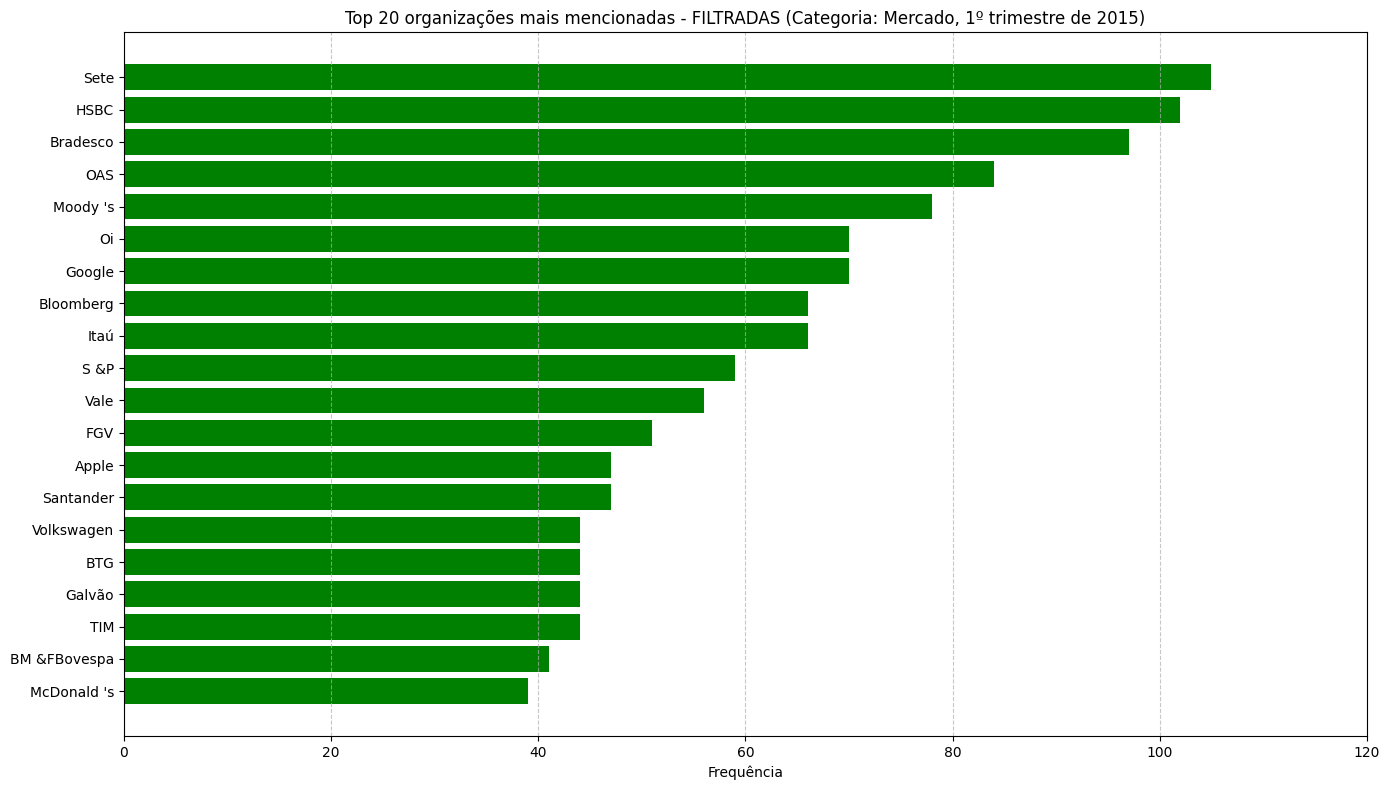

In [83]:
entidades_excluir = ['Brasil', 'Investimentos','Folha']
df_ranking_organizacao_mercado_filtered = df_ranking_organizacao_mercado[~df_ranking_organizacao_mercado['Entidade'].isin(entidades_excluir)]

# Vamos fazer o plot das organizações após essa limpeza:

plt.figure(figsize=(14, 8))
plt.barh(df_ranking_organizacao_mercado_filtered['Entidade'][:top_n][::-1], df_ranking_organizacao_mercado_filtered['Frequência'][:top_n][::-1], color='green')
plt.xlabel('Frequência')
plt.title(f'Top {top_n} organizações mais mencionadas - FILTRADAS (Categoria: Mercado, 1º trimestre de 2015)')

max_freq = df_ranking_organizacao_mercado_filtered['Frequência'].max()
xticks = np.arange(0, max_freq + 20, 20)
plt.xticks(xticks)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

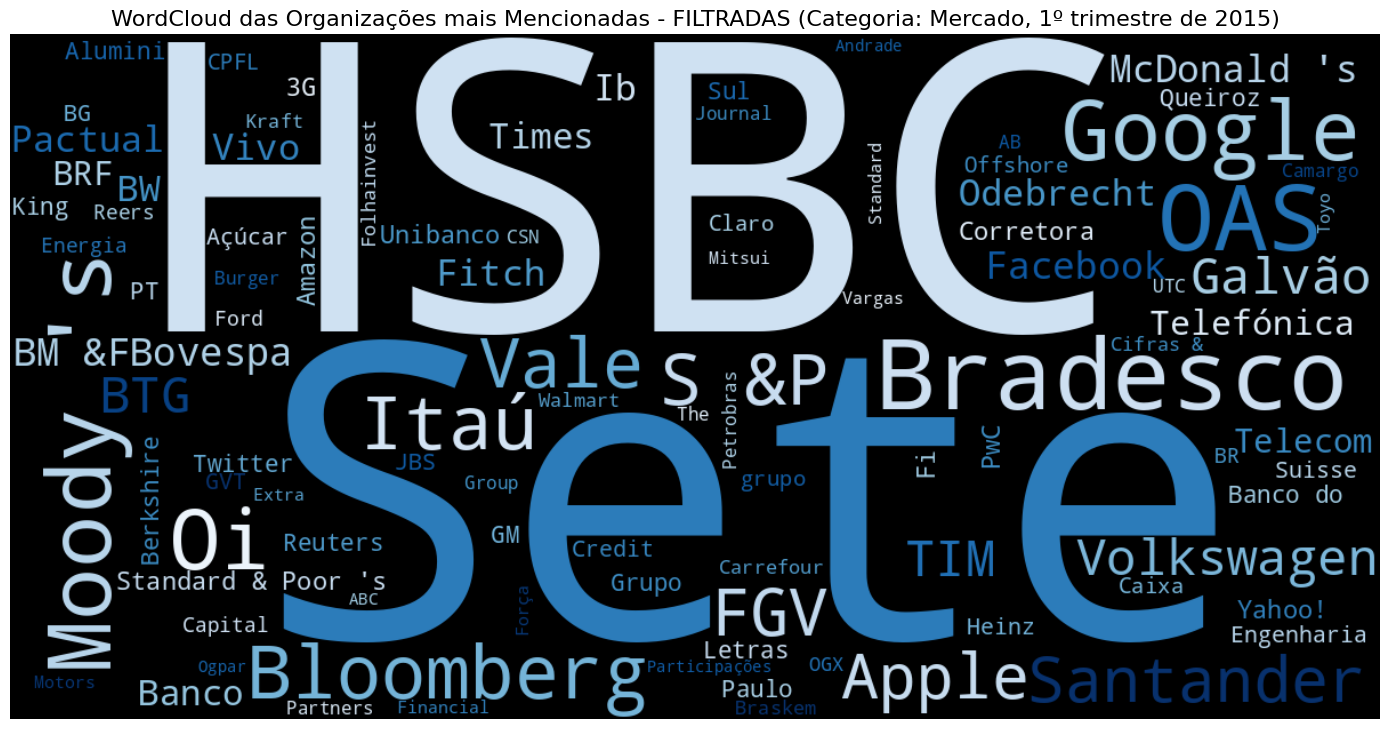

In [84]:

frequencias_filtered = dict(zip(
    df_ranking_organizacao_mercado_filtered['Entidade'],
    df_ranking_organizacao_mercado_filtered['Frequência']
))

wordcloud_filtered = WordCloud(
    width=1200,
    height=600,
    background_color='black',
    colormap='Blues',
    max_words=100
).generate_from_frequencies(frequencias_filtered)

plt.figure(figsize=(14, 8))
plt.imshow(wordcloud_filtered, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud das Organizações mais Mencionadas - FILTRADAS (Categoria: Mercado, 1º trimestre de 2015)', fontsize=16)
plt.tight_layout()
plt.show()
